# Implementing KNN Regressor:

# I:

In [1]:
## Loading the necessary libraries:

library(reshape2)
library(ggplot2)
library(corrplot)
library("Cairo")
library(repr)

corrplot 0.84 loaded



In [2]:
## Reading the training and testing files for the task in R:

train_data <- read.csv("Task1A_train.csv")
test_data <- read.csv("Task1A_test.csv")

In [3]:
## Taking a look at the data:

head(train_data)
head(test_data)

,x1,y
,<dbl>,<dbl>
1,1960.0,0.71
2,1960.5,0.85
3,1961.0,0.61
4,1961.5,0.92
5,1962.0,0.72
6,1962.5,0.92


,x1,y
,<dbl>,<dbl>
1,1960.25,0.63
2,1960.75,0.44
3,1961.25,0.69
4,1961.75,0.55
5,1962.25,0.77
6,1962.75,0.60


In [4]:
## Checking the dimensions of the dataframes:

dim(train_data)
dim(test_data)

[1] 42  2

[1] 42  2

## Visualization:

### Taking a look at the data and observing the relation between input and target variables:

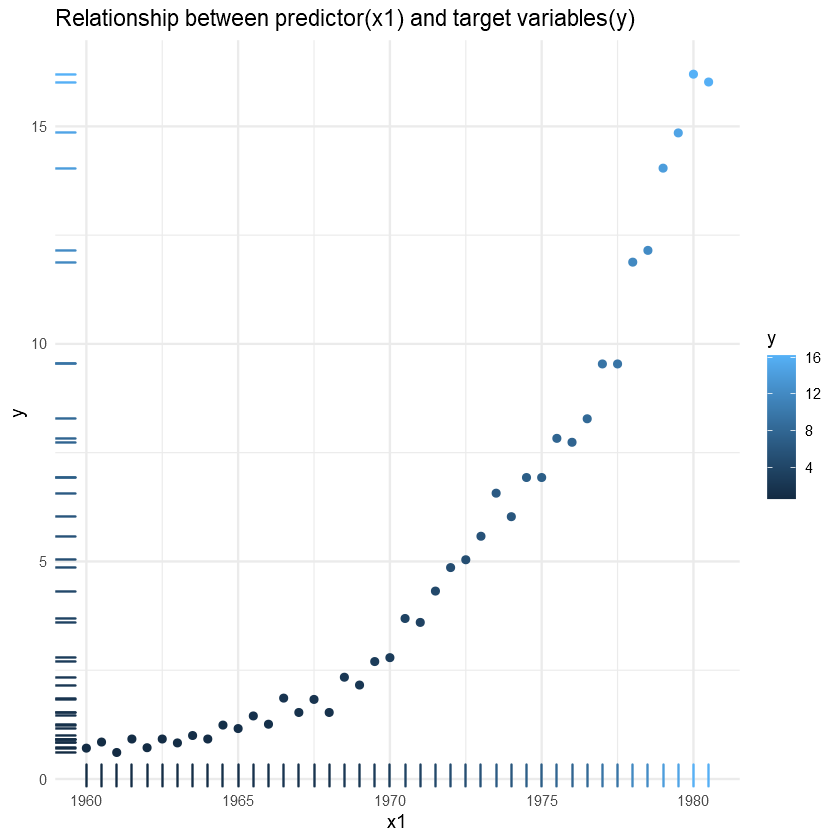

In [5]:
ggplot(data=train_data, aes(x=x1, y=y, color=y)) + 
    geom_point() + geom_rug()+ theme_minimal() + ggtitle("Relationship between predictor(x1) and target variables(y)")

### Training and Testing Sets:

In [6]:
## Create  training and testing input and target data:

train.data <- train_data[ 1] 
train.label <- train_data[-1]
test.data <- test_data[1] 
test.label <- test_data[-1]

train.len <- nrow(train.data)
test.len <- nrow(test.data)

In [7]:
## Checking the new dataframes:

head(train.data)
head(train.label)
 
head(test.data)
head(test.label)

,x1
,<dbl>
1,1960.0
2,1960.5
3,1961.0
4,1961.5
5,1962.0
6,1962.5


,y
,<dbl>
1,0.71
2,0.85
3,0.61
4,0.92
5,0.72
6,0.92


,x1
,<dbl>
1,1960.25
2,1960.75
3,1961.25
4,1961.75
5,1962.25
6,1962.75


,y
,<dbl>
1,0.63
2,0.44
3,0.69
4,0.55
5,0.77
6,0.60


## KNN Regressor:

* Unlike **KNN Classifier** which is based on the concept of **`majority`**, **KNN Regressor** is based on **`mean`** of the data.
* Distance is calculated using **Manhattan** distance method wherein the distance between 2 points is found by adding the **absolute** of differences between the points.

In [8]:
## KNN Regressor function where mean is calculated of k-nearest neighbours instead of the majority votes among them:


knn <- function(train.data, train.label, test.data, K=3, distance = 'manhattan'){
    
    ## Count the number of training data:
    
    train.len <- nrow(train.data)
    
    ## Count the number of test data:
    
    test.len <- nrow(test.data)
    
    ## Calculate distances between the data:
    
    dist <- as.matrix(dist(rbind(test.data, train.data), method= distance))[1:test.len, (test.len+1):(test.len+train.len)]
    
    train.label <- data.frame(train.label)
    test.label <- data.frame(test.label)
        
    ## For each test data point:
    
    for (i in 1:test.len){
        
        ## Find its K nearest neighbours from training samples:
        
        nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
        
        ## Calculate the predicted labels according to the mean of the nearest neighbours:
        
        test.label[i,]<- mean(train.label[nn,])
    }
    
    ## Return the class labels as output:
    
    return (test.label)
}

In [9]:
dist <- as.matrix(dist(rbind(test.data, train.data), method= 'manhattan'))[1:test.len, (test.len+1):(test.len+train.len)]
dist

,43,44,45,46,47,48,49,50,51,52,...,75,76,77,78,79,80,81,82,83,84
1,0.25,0.25,0.75,1.25,1.75,2.25,2.75,3.25,3.75,4.25,...,15.75,16.25,16.75,17.25,17.75,18.25,18.75,19.25,19.75,20.25
2,0.75,0.25,0.25,0.75,1.25,1.75,2.25,2.75,3.25,3.75,...,15.25,15.75,16.25,16.75,17.25,17.75,18.25,18.75,19.25,19.75
3,1.25,0.75,0.25,0.25,0.75,1.25,1.75,2.25,2.75,3.25,...,14.75,15.25,15.75,16.25,16.75,17.25,17.75,18.25,18.75,19.25
4,1.75,1.25,0.75,0.25,0.25,0.75,1.25,1.75,2.25,2.75,...,14.25,14.75,15.25,15.75,16.25,16.75,17.25,17.75,18.25,18.75
5,2.25,1.75,1.25,0.75,0.25,0.25,0.75,1.25,1.75,2.25,...,13.75,14.25,14.75,15.25,15.75,16.25,16.75,17.25,17.75,18.25
6,2.75,2.25,1.75,1.25,0.75,0.25,0.25,0.75,1.25,1.75,...,13.25,13.75,14.25,14.75,15.25,15.75,16.25,16.75,17.25,17.75
7,3.25,2.75,2.25,1.75,1.25,0.75,0.25,0.25,0.75,1.25,...,12.75,13.25,13.75,14.25,14.75,15.25,15.75,16.25,16.75,17.25
8,3.75,3.25,2.75,2.25,1.75,1.25,0.75,0.25,0.25,0.75,...,12.25,12.75,13.25,13.75,14.25,14.75,15.25,15.75,16.25,16.75
9,4.25,3.75,3.25,2.75,2.25,1.75,1.25,0.75,0.25,0.25,...,11.75,12.25,12.75,13.25,13.75,14.25,14.75,15.25,15.75,16.25
10,4.75,4.25,3.75,3.25,2.75,2.25,1.75,1.25,0.75,0.25,...,11.25,11.75,12.25,12.75,13.25,13.75,14.25,14.75,15.25,15.75


In [10]:
## Testing for 3-nearest neighbours:

for (i in 1:test.len)
{
    nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:3,2]
    print(nn)  
}

[1] 1 2 3
[1] 2 3 1
[1] 3 4 2
[1] 4 5 3
[1] 5 6 4
[1] 6 7 5
[1] 7 8 6
[1] 8 9 7
[1]  9 10  8
[1] 10 11  9
[1] 11 12 10
[1] 12 13 11
[1] 13 14 12
[1] 14 15 13
[1] 15 16 14
[1] 16 17 15
[1] 17 18 16
[1] 18 19 17
[1] 19 20 18
[1] 20 21 19
[1] 21 22 20
[1] 22 23 21
[1] 23 24 22
[1] 24 25 23
[1] 25 26 24
[1] 26 27 25
[1] 27 28 26
[1] 28 29 27
[1] 29 30 28
[1] 30 31 29
[1] 31 32 30
[1] 32 33 31
[1] 33 34 32
[1] 34 35 33
[1] 35 36 34
[1] 36 37 35
[1] 37 38 36
[1] 38 39 37
[1] 39 40 38
[1] 40 41 39
[1] 41 42 40
[1] 42 41 40


In [11]:
knn(train.data, train.label, test.data, K=3)

y
<dbl>
0.7233333
0.7233333
0.7933333
0.7500000
0.8533333
0.8233333
0.9166667
0.9166667
1.0533333


In [12]:
## Calculate the train and test missclassification rates for K values ranging from 1 to 30 using Root Mean Square Error method:

miss <- data.frame('K'=1:30, 'train'=rep(0,30), 'test'=rep(0,30))
for (k in 1:30){
    
    ## Storing the predictions for the training and testing data:
    
    train_y_pred <- knn(train.data, train.label, train.data, K=k)
    
    test_y_pred <- knn(train.data, train.label, test.data, K=k)
    
    ## Calculating residuals i.e, difference between the predicted and true values:
    
    residuals_train <- train_y_pred - train.label
    
    residuals_test <- test_y_pred - test.label
    
    ## Calculating the square of residuals:
    
    train_residual <- residuals_train*residuals_train
    
    test_residual <- residuals_test*residuals_test
    
    ## Calculating the mean of the residuals:
    
    mean_train <- mean(train_residual$y, na.rm=TRUE)
    
    mean_test <- mean(test_residual$y, na.rm=TRUE)
    
    ## Calculating the square root of the calculated mean and storing it in the dataframe corresponding to the K-value
    ## which will be used for visualization:
    
    miss[k,'train'] <- sqrt(mean_train)
    miss[k,'test'] <-  sqrt(mean_test)
}


# II: Plot the training and the testing errors versus 1/K for K=1,.., 30 in one plot:

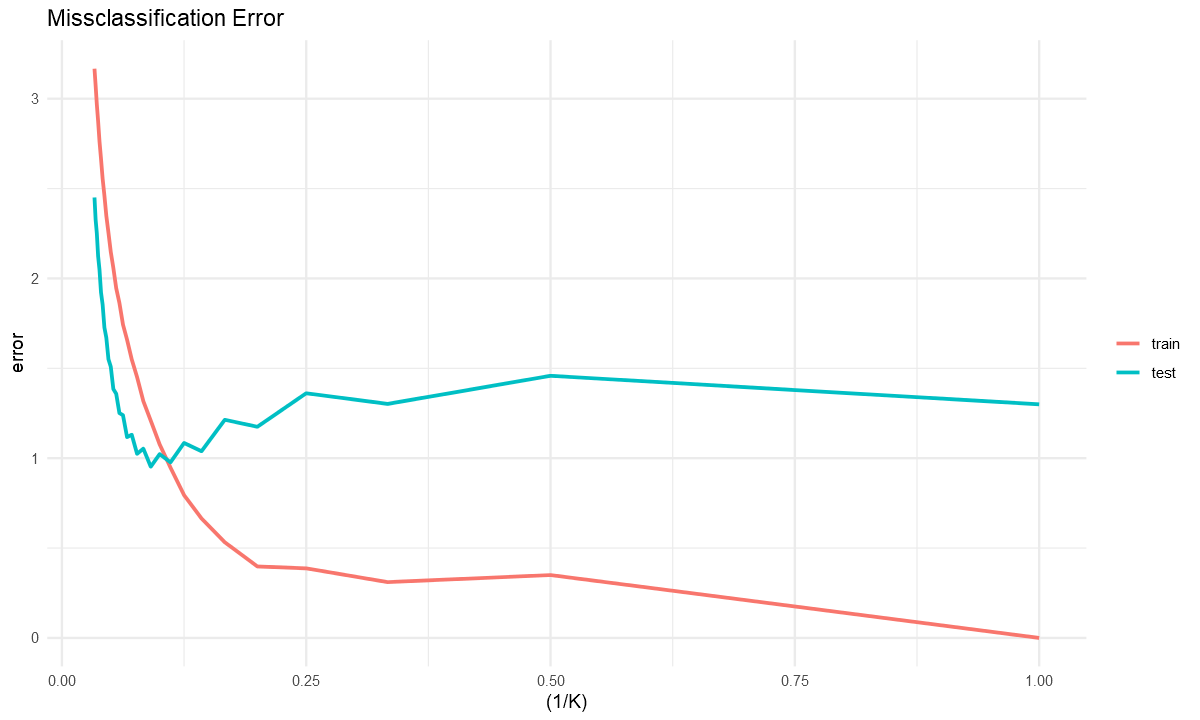

In [13]:
## Plot misclassification percentage for train and test data sets:

options(repr.plot.width=10, repr.plot.height=6)

miss.m <- melt(miss, id='K')                                                         ## Reshape for visualization
names(miss.m) <- c('K', 'type', 'error')
ggplot(data=miss.m, aes(x=(1/K), y=error, color=type)) + geom_line(size=0.8) +
       scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() +
       ggtitle("Missclassification Error")

### Observation:

It is evident from the above graph that the **training error** keeps on **reducing** as **1/K** increases while the **testing error reduces** upto the **convergence point** and then **increases** after that point it increases.

# III:

- The optimum value of <b>K</b> is at the **convergence point** when (1/K) is around 0.120 which approximates the value of K at 8.3333 and hence the range of <b>K</b> can be from <b>8</b> to <b>10</b> as optimum values.
- Model complexity **increases** as **training error decreases** and **testing error increases** as it overfits on the unseen data as it has learned the training set all too well.
- The area before the convergence point indicates **underfitting** while the area after that the model is **overfitting**.